# Intro to Deep Learning: Neural Networks for Digit Classification, Using Keras
---
Today, we'll be using Keras to **train a neural network to classify handwritten digits**. To do this, we'll be taking advantage of the pre-labeled [**MNIST dataset**](https://en.wikipedia.org/wiki/MNIST_database), which contains 70,000 grayscale images of handwritten digits, along with their corresponding digit labels.

Since we want our model to be able to perform well in the real world on **previously unseen data**, we'll only train it on 60,000 images, and then evaluate our model on the remaining 10,000.

### Introductory Guides:
* Workshop presentation slides: [here](https://docs.google.com/presentation/d/1RHnHtlQt9nWoIsmiDPNZ4aoWPIzRt1X3OFm304OfmbQ/edit?usp=sharing)
* Getting started with Keras: https://keras.io/
* Keras Sequential model introductory guide: https://keras.io/getting-started/sequential-model-guide/
* Keras Sequential model documentation: https://keras.io/models/sequential/
* Keras core layers: https://keras.io/layers/core/

### Topic-Specific Resources/Documentation:
* Numpy arrays: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html
* Activation Functions - ML Cheatsheet: http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
* Activation Functions - Keras Documentation: https://keras.io/activations/
* Cost/Loss Functions - ML Cheatsheet: http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
* Cost/Loss Functions - Keras Documentation: https://keras.io/losses
* Keras Optimizers (e.g. Gradient Descent): https://keras.io/optimizers

## Loading in MNIST

In [2]:
# Import MNIST dataset from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# Data exploration

print("Inputs shape is " + str(train_x.shape)) # 60,000 samples, each image: 28 x 28 pixels
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is " + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <type 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is (60000,)
Labels type is <type 'numpy.ndarray'>


In [4]:
# Matplotlib: Data visualization library
import matplotlib.pyplot as plt

5


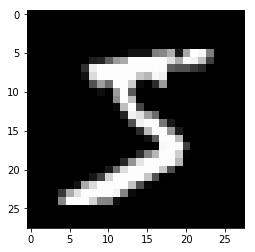

In [5]:
# Visualize the input samples

sample_num = 0 # change this number and re-run the cell to see different image samples!

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

## Pre-Processing the Data: 
* **Flatten** the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in the 784-dimensional input layer of our neural network.
* **Normalize** the pixel values from 0-255 to 0-1. We can do this by simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values, so this normalization is a pretty common first step in most deep learning tasks.
* **Categorize** the outputs into 10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image (e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just the digit number itself. We want our training labels to match up with our neural network output. These categorized vectors contain all 0's, except a 1 in the location indicating which digit the image corresponds to.

In [6]:
# Flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2] # 28 * 28 = 784
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [7]:
# Normalize pixel values to between 0-1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [8]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(train_y_categorical[:5]) # print out first 5 training label vectors

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


## Creating our Neural Network Model
1. **Initialize** the network, add desired layers. The settings we decide to use, e.g. number of layers, number of neurons per layer, are called **hyperparameters**, and have to be tuned by hand, rather than learned via gradient descent.
2. **Compile** the network to get ready for training. This tells the network what cost/loss function to use ("cost" and "loss" are used interchangeably), and what type of gradient descent to use.
3. **Fit** the network to the training images. This actually feeds the training data into the network, and uses gradient descent and backpropagation to adjust the network's weights in order to minimize the cost function.

In [15]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# NOTE: This model contains some tweaks from the original 'incomplete' notebook in order to improve performance.
    # 1. Use 'relu' activation instead of 'sigmoid' for hidden layer
    # 2. Use 'softmax' activation for final output layer
    # 3. Use 'categorical crossentropy' loss function, instead of 'mean-squared-error'
    # See the links provided below for more info

# Hidden layer 1: 64 neurons, 'relu' activation 
    # (see: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
    # http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
model.add(Dense(units=64, input_dim=784, activation='relu'))

# Hidden layer 2: 32 neurons, 'relu' activation
model.add(Dense(units=32, activation='relu'))

# Output layer: 10 neurons (one for each class), 'softmax' activation
    # This layer represents the scores that the network assigns to each possible digit, 1-10
    # See: http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/
model.add(Dense(units=10, activation='softmax'))


In [16]:
# Compile the model, get ready to train

    # Loss: Categorical Crossentropy
        # See: http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
    # Optimizer: stochastic gradient descent (SGD)
    # Additional metrics: Accuracy

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    

In [17]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model to the training data

# Train the model
    # Number of epochs: 10 (i.e. how many times to loop over the training data)
    # Batch size: 16 (how big our "drunk walk" samples should be)
    # See: 'fit()' in https://keras.io/models/sequential/
    
model.fit(train_x_flattened, train_y_categorical, epochs=10, batch_size=16)
    

Epoch 1/10
60000/60000 [==============================] - 10s - loss: 0.4830 - acc: 0.8683    
Epoch 2/10
60000/60000 [==============================] - 10s - loss: 0.2400 - acc: 0.9318    
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.1904 - acc: 0.9455     
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 0.1583 - acc: 0.9541     
Epoch 5/10
60000/60000 [==============================] - 9s - loss: 0.1354 - acc: 0.9608     
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 0.1179 - acc: 0.9667     
Epoch 7/10
60000/60000 [==============================] - 11s - loss: 0.1049 - acc: 0.9698    
Epoch 8/10
60000/60000 [==============================] - 11s - loss: 0.0943 - acc: 0.9726    
Epoch 9/10
60000/60000 [==============================] - ETA: 0s - loss: 0.0852 - acc: 0.975 - 10s - loss: 0.0853 - acc: 0.9750    
Epoch 10/10
60000/60000 [==============================] - 10s - loss: 0.0778 - acc: 0.9777    


## Evaluating our Neural Network

In [19]:
# Evaluate trained model on test data

# Returns final test loss & test accuracy
    # See: 'evaluate' in https://keras.io/models/sequential/
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)
final_cost = loss_and_metrics[0]
final_accuracy = loss_and_metrics[1]

print()
print("Final test cost: ", final_cost)
print("Final test accuracy: ", final_accuracy)

 8064/10000 [=======================>......] - ETA: 0s()
('Final test cost: ', 0.098051422105729577)
('Final test accuracy: ', 0.97109999999999996)


**Final Sanity Check:** Make sure the our neural network's predictions match up with the actual images

('Output vector: ', array([  9.99697328e-01,   5.96056964e-08,   2.26069285e-04,
         1.68353509e-07,   1.35627394e-08,   2.60624370e-06,
         6.07639631e-05,   1.78718125e-07,   1.36605721e-07,
         1.26789255e-05], dtype=float32))
('Predicted digit: ', 0)


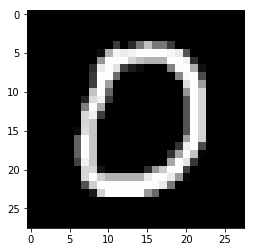

In [20]:
import numpy as np

sample_num = 10 # which test sample to look at. TODO: Play around with this number to see how \
    # our neural network performs on different test images

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print("Output vector: ", predicted_scores[0]) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print("Predicted digit: ", predicted_class) # print predicted classification

# Show actual input image
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()

## Congrats! You just did deep learning!
If you have extra time, feel free to play around with the hyperparameters (number of neurons per layer, number of epochs, batch size, etc.) to see if you can improve the network's final accuracy.